In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath
import os
import sys
import time
#import networkx as nx
#import seaborn as sns
from graph_tool.all import *
#from pyunicorn.core.network import Network

In [2]:
taumax2_subseas = 1
taumax4_subseas = 0
taumax6_subseas = 0
taumax8_subseas = 0
taumax10_subseas = 0
taumax12_subseas = 0
taumax14_subseas = 0
taumax16_subseas = 0

In [3]:
perc95 = 1
perc99 = 0
surr100 = 0
surr1000 = 1

In [4]:
if surr100:
    surr = 'surr100'
elif surr1000:
    surr = 'surr1000'

In [5]:
if perc95:
    perc = '95perc'
elif perc99:
    perc = '99.5perc'

In [6]:
file_path = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/'
file_lats = 'lats.4dx4dy_ndjfm.txt'
file_lons = 'lons.4dx4dy_ndjfm.txt'
 
if taumax2_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax2_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax2.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax2.4dx4dy.ndjfm.txt'
    taumax = 2
    
elif taumax4_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax4_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax4.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax4.4dx4dy.ndjfm.txt'
    taumax = 4
    
elif taumax6_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax6_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax6.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax6.4dx4dy.ndjfm.txt'
    taumax = 6
    
elif taumax8_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax8_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax8.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax8.4dx4dy.ndjfm.txt'
    taumax = 8


elif taumax10_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax10_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax10.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax10.4dx4dy.ndjfm.txt'
    taumax = 10

elif taumax12_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax12_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax12.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax12.4dx4dy.ndjfm.txt'
    taumax = 12

elif taumax14_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax14_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax14.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax14.4dx4dy.ndjfm.txt'
    taumax = 14

elif taumax16_subseas:
    file_path2 = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/NDJFM/ES_taumax16_subseas/'

    #files to read
    file_info_about_es_field = 'es_info_subseas'+perc+'_'+surr+'.taumax16.4dx4dy.ndjfm.txt'
    file_complex_network = 'complex_network_subseas'+perc+'_'+surr+'.taumax16.4dx4dy.ndjfm.txt'
    taumax = 16

In [7]:
save_path = '/atm_glomod/user/osahin/data/ERA5/daymean_1979-2019/Complex_network_analysis/'

In [8]:
start_time = time.time()
compl_net = np.loadtxt(file_path2+file_complex_network)
end_time = time.time()
print("approx. time in minutes taken this code segment: ", int((end_time - start_time)/60))

approx. time in minutes taken this code segment:  6


In [9]:
info_about_complex_field = np.loadtxt(file_path2+file_info_about_es_field)

In [10]:
lats = np.loadtxt(file_path+file_lats)
lons = np.loadtxt(file_path+file_lons)

In [11]:
compl_net

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [12]:
info_about_complex_field  #number of links in es-adjacency matrix after surroate significance testing, number of links in es-adjacency matrix, percentage of significant links in adjacency matrix

array([1.18742898e+08, 6.55029482e+08, 1.81278708e+01])

In [13]:
compl_net.shape

(25600, 25600)

In [14]:
lat_lon = []
for i in range(lats.shape[0]):
    for j in range(lons.shape[0]):
        lat_lon.append(np.array([lats[i], lons[j]]))

In [15]:
lat_lon_arr = np.array(lat_lon)

In [16]:
lat_lon_arr[:,0]

array([89.78487691, 89.78487691, 89.78487691, ...,  0.98360626,
        0.98360626,  0.98360626])

In [17]:
#node-weights cos(lat)
node_weights = np.cos(np.radians(lat_lon_arr[:,0]))

In [18]:
net = Network(adjacency=compl_net, directed=True, node_weights=node_weights)
print(net)

Network: directed, 25600 nodes, 118742898 links, link density 0.181.


# Complex network analysis

### The degree (sum of all connections to other nodes)  is not equal in both dimensions (axis=0 and axis=1), so this is a directet graph, which was expected

In [19]:
indegree = compl_net.sum(axis=1) #Verbindungen, die von allen anderen Knoten zum jeweiligen Knoten zeigen

In [20]:
outdegree = compl_net.sum(axis=0) #Verbindungen, die vom jeweiligen Knoten zu allen anderen Knoten zeigen

In [21]:
outdegree == indegree

array([False, False, False, ..., False, False, False])

In [22]:
outdegree

array([6783., 6783., 6783., ..., 4165., 4144., 4371.])

In [23]:
indegree

array([7515., 7515., 7515., ..., 3957., 4122., 4141.])

In [24]:
outdegree.max()

8555.0

In [25]:
np.argwhere(outdegree==outdegree.max()) #Knoten ### hat die meisten Verbindungen zu anderen Knoten

array([[3026]])

In [26]:
max_outdegree_coords = lat_lon[np.argwhere(outdegree==outdegree.max())[0,0]] #lat, lon Position, des Knotens ###
max_outdegree_coords

array([ 79.67203535, -15.75      ])

In [27]:
indegree.max()

9501.0

In [28]:
np.argwhere(indegree==indegree.max()) #Knoten ### hat die meisten Verbindungen von anderen Knoten

array([[21573]])

In [29]:
max_indegree_coords = lat_lon[np.argwhere(indegree==indegree.max())[0,0]] #lat, lon Position, des Knotens ###
max_indegree_coords

array([ 14.47306341, -30.375     ])

In [30]:
average_in_and_out_degree = (indegree + outdegree).mean(axis=0) 
average_in_and_out_degree

9276.78890625

In [31]:
(indegree + outdegree).shape

(25600,)

In [40]:
indegree.sum(axis=0)

118742898.0

In [39]:
outdegree.sum(axis=0)

118742898.0

In [38]:
(indegree + outdegree).sum(axis=0)/2

118742898.0

# Average degree (avdeg)
# $\tau_{max}$ = 2 : avdeg = 9276.417890625
# $\tau_{max}$ = 8 : avdeg = 6615.441484375
# $\tau_{max}$ = 16 : avdeg = 5655.385546875

### Ny-Alesund 78.54792, 12.375

lat_lon[3371]

outdegree[3371] #Verbindungen von Ny-Alesund 78.54792, 12.375

indegree[3371] #Verbindungen zu Ny-Alesund 78.54792, 12.375

### Degree Distribution

both distributions look like poisson distributions with a strong psitive skewness(??)

### Edge density

### Betweenes Centrality

In [93]:
compl_net.shape

(25600, 25600)

In [94]:
#creating a graphtool Graph
g = graph_tool.Graph()

g.add_vertex(compl_net.shape[0])

g.add_edge_list(np.transpose(compl_net.nonzero()))

In [95]:
g

<Graph object, directed, with 25600 vertices and 118742898 edges at 0x7fbf1c7844a8>

In [24]:
vertex_bc, edge_bc = graph_tool.centrality.betweenness(g)

In [25]:
bc = vertex_bc.a.reshape(80,320)

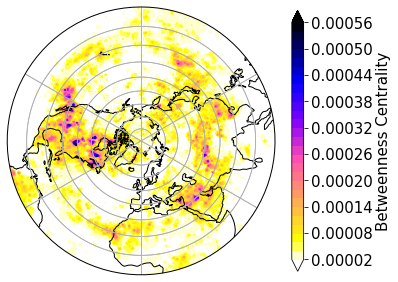

In [26]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.
clevs = [0.00002, 0.00004, 0.00006, 0.00008, 0.00010, 0.00012, 0.00014, 0.00016, 0.00018, 0.00020, 0.00022, 0.00024, 0.00026, 0.00028, 0.00030, 0.00032, 0.00034, 0.00036, 0.00038, 0.00040, 0.00042, 0.00044, 0.00046, 0.00048, 0.00050, 0.00052, 0.00054, 0.00056]

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Betweenness Centrality', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#clevs = [0.00008, 0.00016, 0.00024, 0.00032, 0.00040, 0.00048]

bc_map = ax.contourf(lons, lats, bc, cmap=plt.cm.gnuplot2_r, extend='both', levels=clevs, transform=ccrs.PlateCarree()) # extend='both', , levels=clevs

cmap = plt.colorbar(bc_map, ax=ax, shrink=0.4)
cmap.set_label('Betweenness Centrality',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(save_path + 'bc_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

In [27]:
# bc is high for grid points, which lie on many shortest paths between any pair of grid points
# a high bc value indicates, that that grid point may be important for the propagation of extreme-slp

Betweenness centrality of a vertex $C_B(v)$ is defined as,

$C_B(v)=\sum_{s \neq v \neq t \epsilon V, s \neq t}  \frac{\sigma_{st}(v)}{\sigma_{st}}$

where $\sigma_{st}$ is the number of shortest paths from $s$ to $t$, and $\sigma_{st} (v)$ is the number of shortest paths from $s$ to $t$ that pass through a vertex $v$. This may be normalised by dividing through the number of pairs of vertices not including $v$, which is $(n-1)(n-2)/2$, for undirected graphs, or $(n-1)(n-2)$ for directed ones.

The algorithm used here is defined in [brandes-faster-2001], and has a complexity of $O(VE)$ for unweighted graphs and $O(VE+V(V+E)logV)$ for weighted graphs. The space complexity is $O(VE)$.

If the pivots parameter is given, the complexity will be instead $O(PE)$ for unweighted graphs and $O(PE+P(V+E)logV)$ for weighted graphs, where $P$ is the number of pivot vertices.

### Eigenvector Centrality

In [28]:
ev, vertex_ec = graph_tool.centrality.eigenvector(g)

In [29]:
ec = vertex_ec.a.reshape(80,320)

In [30]:
np.linspace(0.002,0.018,33).tolist()

[0.002,
 0.0025,
 0.003,
 0.0035,
 0.004,
 0.0045000000000000005,
 0.005,
 0.0055,
 0.006,
 0.006500000000000001,
 0.007,
 0.0075,
 0.008,
 0.0085,
 0.009000000000000001,
 0.0095,
 0.01,
 0.0105,
 0.011000000000000001,
 0.0115,
 0.012,
 0.0125,
 0.013,
 0.0135,
 0.014,
 0.0145,
 0.015000000000000001,
 0.0155,
 0.016,
 0.0165,
 0.017,
 0.0175,
 0.018]

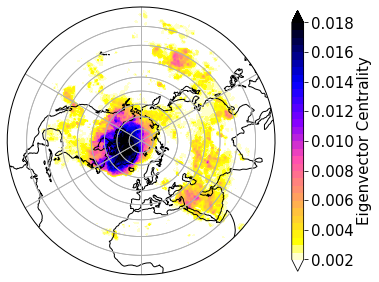

In [31]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.
clevs = np.linspace(0.002,0.018,33).tolist()#[0.002, 0.004, 0.006, 0.008, 0.010, 0.012, 0.014, 0.016, 0.018]

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Eigenvector Centrality', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

#clevs = [0.00008, 0.00016, 0.00024, 0.00032, 0.00040, 0.00048]

ec_map = ax.contourf(lons, lats, ec, cmap=plt.cm.gnuplot2_r, extend='both', levels=clevs, transform=ccrs.PlateCarree()) # extend='both', 

cmap = plt.colorbar(ec_map, ax=ax, shrink=0.4)
cmap.set_label('Eigenvector Centrality',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(save_path + 'ec_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

The eigenvector centrality $x$ is the eigenvector of the (weighted) adjacency matrix with the largest eigenvalue $\lambda$, i.e. it is the solution of

$Ax= \lambda x$,

where $A$ is the (weighted) adjacency matrix and $\lambda$ is the largest eigenvalue.

The algorithm uses the power method which has a topology-dependent complexity of $O(N \cdot \frac{-\log \epsilon}{\log|\lambda_{1}/\lambda_{2}|})$, where $N$ is the number of vertices, $\epsilon$ is the epsilon parameter, and $\lambda_1$ and $\lambda_2$ are the largest and second largest eigenvalues of the (weighted) adjacency matrix, respectively.

If enabled during compilation, this algorithm runs in parallel.

### Clustering Coefficient

In [96]:
vertex_cc = graph_tool.clustering.local_clustering(g, undirected=False)

In [97]:
cc = vertex_cc.a.reshape(80,320)

In [98]:
average_cc = vertex_cc.a.mean(axis=0)
average_cc

PropertyArray(0.43962184)

# Average clustering coefficient
# $\tau_{max}$ = 2 : avcc = 0.43962184
# $\tau_{max}$ = 8 : avcc = 0.43926624
# $\tau_{max}$ = 16 : avcc = 0.43029825

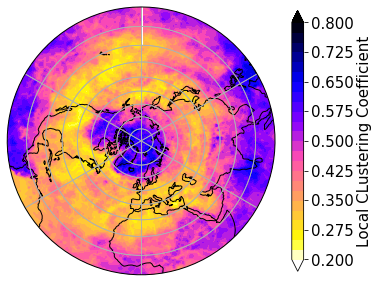

In [99]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.
clevs = np.linspace(0.2,0.8, 25).tolist()#[0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
    
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Local CLustering Coefficient', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

cc_map = ax.contourf(lons, lats, cc, cmap=plt.cm.gnuplot2_r, extend='both', levels=clevs, transform=ccrs.PlateCarree())#

cmap = plt.colorbar(cc_map, ax=ax, shrink=0.4)
cmap.set_label('Local CLustering Coefficient',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(save_path + 'lcc_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

In [100]:
#cc measures the degree of spatial coherence in the distribution of extreme slp

The local clustering coefficient [watts-collective-1998] $c_i$ is defined as

$$c_i= \frac{|e_{jk}|}{k_i(k_i-1)} :v_j,v_k \epsilon N_i, e_{jk} \epsilon E$$

where $k_i$ is the out-degree of vertex $i$, and
$N_i={v_j:e_{ij} \epsilon E}$

is the set of out-neighbors of vertex $i$. For undirected graphs the value of $c_i$ is normalized as
$c'_i=2c_i$.

The implemented algorithm runs in $O(|V|<k^2>)$ time, where $<k^2>$ is second moment of the degree distribution.

If enabled during compilation, this algorithm runs in parallel.

### Average Path Length

In [101]:
dist = graph_tool.all.shortest_distance(g, directed=True)
avpl = sum([sum(i) for i in dist])/(g.num_vertices()**2-g.num_vertices())

In [102]:
avpl

1.8188148783277667

# Average path length (avpl)
# $\tau_{max}$ = 2 : avpl =  1.8188148783277667
# $\tau_{max}$ = 8 : avpl = 1.8846421170626781
# $\tau_{max}$ = 16 : avpl = 1.9256884592049495

Consider an unweighted directed graph $G$ with the set of vertices $V$. Let $d(v_1, v_2)$, where $v_1$, $v_2$ $\epsilon$ $V$ denote the shortest distance between $v_1$  and $v_2$. Assume that $d(v_1, v_2) = 0$ if $v_2$ cannot be reached from $v_1$. Then, the average path length $l_{G}$ is: 

$l_{G}= \frac{1}{n(n-1)} \sum_{i \neq j} d(v_1, v_2)$,

where $n$ is the number of vertices in $G$. 

### Mean Geographical Distance

In [37]:
#think about weighting of nodes for this measure
#maybe the solution is to consider nsi_average_path_length together with mgd

#### MGD

In [38]:
#mean geographical distance of incoming and outgoing links at every node

# Network Divergence

$ \Delta S_i = S_{i}^{in} - S_{i}^{out} = \sum_{j=1}^{N} A_{ij} - \sum_{j=1}^{N} A_{ji}$

In [39]:
network_divergence = indegree - outdegree

In [40]:
np.linspace(-3000,3000,33).tolist()

[-3000.0,
 -2812.5,
 -2625.0,
 -2437.5,
 -2250.0,
 -2062.5,
 -1875.0,
 -1687.5,
 -1500.0,
 -1312.5,
 -1125.0,
 -937.5,
 -750.0,
 -562.5,
 -375.0,
 -187.5,
 0.0,
 187.5,
 375.0,
 562.5,
 750.0,
 937.5,
 1125.0,
 1312.5,
 1500.0,
 1687.5,
 1875.0,
 2062.5,
 2250.0,
 2437.5,
 2625.0,
 2812.5,
 3000.0]

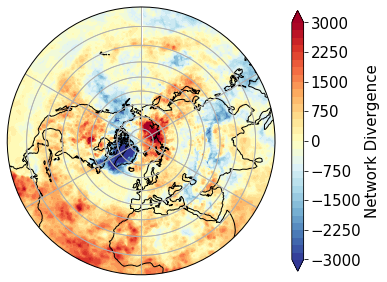

In [41]:
#due to the default threshold being too large for this use case, the private _threshold attribute is divided by 100
#smooths the connection plot 
hacked_proj = ccrs.NorthPolarStereo()
hacked_proj._threshold /= 100.

f = plt.figure(figsize=(6, 12))
proj = hacked_proj
   
# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

clevs = np.linspace(-3000,3000,33).tolist()#[-3000, -1500, 0, 1500, 3000]
ax = plt.axes(projection=proj)
ax.coastlines()
ax.set_global()
 
gl = ax.gridlines(draw_labels=False, xlocs=None, ylocs=None)  #to have smoother gridlines/latitude-lines
gl.n_steps = 90
    
#ax.set_title('Network Divergence', fontsize=16)
ax.gridlines()
ax.set_extent([-180, 180, 90, 1], ccrs.PlateCarree())
ax.set_boundary(circle, transform=ax.transAxes)

net_div_map = ax.contourf(lons, lats, network_divergence.reshape(80,320), levels=clevs, cmap=plt.cm.RdYlBu_r, extend='both', transform=ccrs.PlateCarree())

cmap = plt.colorbar(net_div_map, ax=ax, shrink=0.4)
cmap.set_label('Network Divergence',size=15)
cmap.ax.tick_params(labelsize=15)

plt.show()
f.savefig(save_path + 'network_divergence_taumax' + str(taumax) + '_' + perc + '_' + surr + '.png', bbox_inches='tight', dpi=f.dpi)

In [42]:
# positive values indicate sinks of the directed newtwork and negative values indicate sources
# sinks in the context of extreme low slp are regions, where synchronized extreme low slp occurs within taumax days after it occured in several other regions
# sources in this context are regions, where synchronized extreme low slp occurs within taumax days before it occures in several other regions

# Strength in and out of Spitsbergen

$ S_i^{in} (R) = \frac{1}{|R|} \sum_{j \epsilon R} A_{ij}$

$ S_i^{out} (R) = \frac{1}{|R|} \sum_{j \epsilon R} A_{ji}$